#Data Cleaning and Preprocessing

Problem:
The goal of this project is to predict whether a bank client will subscribe to a term deposit based on their demographic information, financial status, and previous interactions with the bank’s marketing campaigns.

The dataset includes features such as the client's age, job, marital status, account balance, loan status, previous campaign outcomes, and specifics of the latest contact (e.g., call duration). By analyzing these features, I aim to identify patterns that can help the bank target likely subscribers more effectively, optimizing their marketing strategy and improving campaign success rates.

The main challenge is dealing with class imbalance, as there are typically more non-subscribers than subscribers, which requires careful model tuning to avoid bias towards the majority class.

Objective:

Develop a predictive model to classify clients as likely or unlikely to subscribe to a term deposit.
The target variable is y, which indicates whether the client subscribed (yes) or not (no).


Dataset Link: https://archive.ics.uci.edu/dataset/222/bank+marketing


##Step 1: Load the Data and Initial Inspection


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('bank.csv', delimiter=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


###Data Description
From the summary, we have 16 initial features to work with, No null features, and a label for each feature. To summarize each feature:
1. Age:
  - Type: Numeric
  - Description: The age of the client.
  - Impact: Certain age groups may be more likely to invest in term deposits, so age could be a useful predictor.
2. Job:
  - Type: Categorical
  - Categories: Various professions (e.g., "admin", "blue-collar", "entrepreneur").
  - Description: Type of job the client holds.
  - Impact: Different occupations may correlate with financial stability or investment likelihood. For instance, certain professions may be more inclined to invest in term deposits.
3. Marital:
  - Type: Categorical
  - Categories: "married", "divorced", "single"
  - Description: Marital status of the client.
  - Impact: Marital status could affect financial priorities and risk tolerance, influencing investment behavior.
4. Education:

  - Type: Categorical
  - Categories: "primary", "secondary", "tertiary", "unknown"
  - Description: The education level of the client.
  - Impact: Higher education levels might correlate with higher income and a greater tendency to invest.

5. Default:
  - Type: Binary
  - Values: "yes", "no"
  - Description: Indicates if the client has credit in default
  - Impact: Clients with credit in default may be less likely to subscribe to a deposit
6. Balance:
  - Type: Numeric
  - Description: Average yearly balance in the ckuebt's account (in euros).
  - Impact: Clients with a housing lone may have less disposable income, potentially decreasing their likelihood of subscrubing to a term deposit.
7. Housing:
  - Type: Binary
  - Description: Indicates if the client has a housing loan.
  - Impact: Clients with a housing loan may have less disposable income, potentially decreasing their likelihood of subscribing to a term deposit.
8. Loan:
  - Type: Binary
  - Values: "yes", "no"
  - Description: indicates if client has a personal loan
  - ImpactL Reduces available funds, making a term deposit less appealing
**Last Contact of the Current Campaign**

9. Contact:
  - Type: Categorical
  - Categories: "telephone", "cellular", "unknown"
  - Impact: The communication channel could influence engagement. For instance clients reached by cellular might be easier to reach and more likely to respond positively.

10. Day
  - Type: Numeric
  - Description: Day of the month when the client was last contacted
  - Impact: This feature alone may have little predictive powe, but combined with month, it could capture seasonal patterns

11. Month
  - Type: Categorical
  - CategoriesL "jan", ..., "dec"
  - Description: Last contact month of the year
  - Impact: Certain Months may be more favorable for term deposits due to seasonal promotions or client spending patterns.

12. Duration
  - Type: Numeric
  - Description: Duration of the last contact with the client, in seconds.
  - Impact: Generally, longer call durations indicate a higher level of engagement and are strong indicators of term deposit subscription. However, it should be used cautiously since it’s only known after the call.

**Other Campaign Related Attributes**
13. Campaign:
  - Type: Numeric
  - Description: Number of contacts performed during this campaign for this client (includes the last contact).
  - Impact: High numbers may indicate either persistence by the bank or potential annoyance by the client. A moderate value might be ideal for positive responses.

14. PDays:
  - Type: Numeric
  - Description: Number of days a client was contacted in a previous campaign
  - Values: -1 indicates the client was not previously contacted.
  - Impact: Recent contacts may positively impact likelihood of subscription.
15. Previous:
  - Type: Numeric
  - Description: Number of contacts performed before this campaign for this client.
  - Impact: Clients with prior contacts might be more familiar with the bank's offerings, increasing their chance of conversion, although excessive contact could indicate resistance.
16. Poutcome:
  - Type: Categorical
  - Categories: "unknown", "success", "failure", "other"
  - Description: Outcome of the previous marketing campaign for this client
  - Impact: A previous "success" might make a client more receptive to a new term deposit offer, while a "failure" could indicate resistance.

**Target Variable**
17. y (Target Variable):
  - Type: Binary
  - Values: "yes", "no"
  - Description: Indicates whether the client subscribed to a term deposit (the goal of the prediction).
  - Impact: This is the variable we’re trying to predict using the other features.



First of all, I want to see relationships between different variables and the target variable itself. I wonder which variables correlate with each other and which variables correlate with the target variable. Identifying these relationships may help with feature engineering, feature, reduction, and so on.

In [ ]:
from itertools import combinations

features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

feature_pairs = list(combinations(features, 2))
feature_pairs


[('age', 'balance'),
 ('age', 'duration'),
 ('age', 'campaign'),
 ('age', 'pdays'),
 ('age', 'previous'),
 ('balance', 'duration'),
 ('balance', 'campaign'),
 ('balance', 'pdays'),
 ('balance', 'previous'),
 ('duration', 'campaign'),
 ('duration', 'pdays'),
 ('duration', 'previous'),
 ('campaign', 'pdays'),
 ('campaign', 'previous'),
 ('pdays', 'previous')]

y                     no        yes
job                                
admin.         87.866109  12.133891
blue-collar    92.706131   7.293869
entrepreneur   91.071429   8.928571
housemaid      87.500000  12.500000
management     86.480908  13.519092
retired        76.521739  23.478261
self-employed  89.071038  10.928962
services       90.887290   9.112710
student        77.380952  22.619048
technician     89.192708  10.807292
unemployed     89.843750  10.156250
unknown        81.578947  18.421053


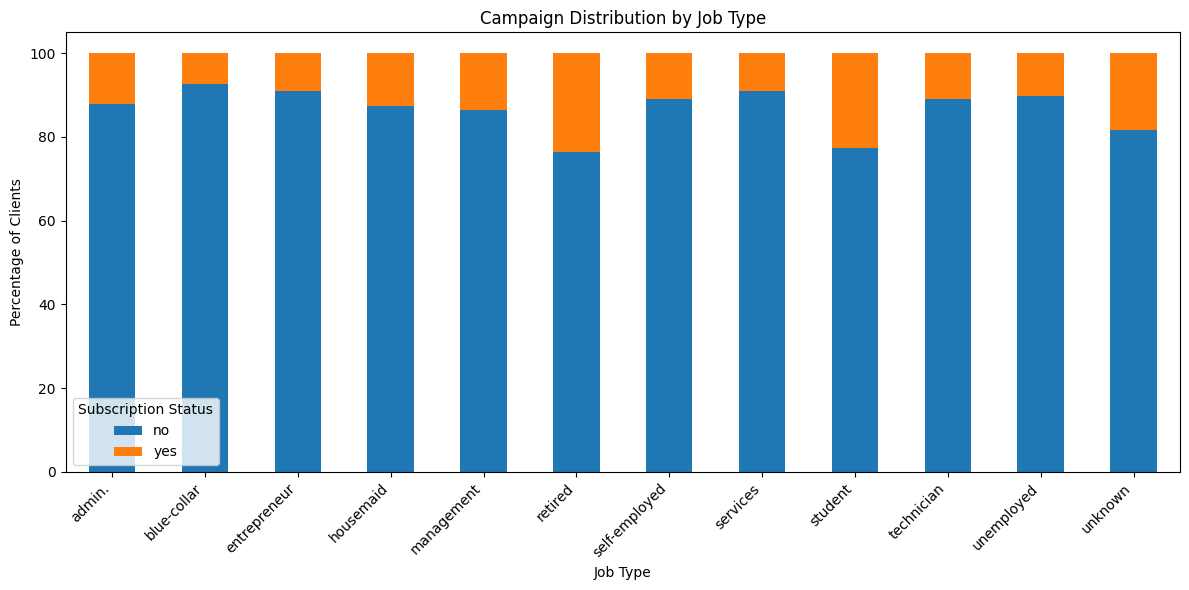

In [ ]:
import matplotlib.pyplot as plt
campaign_distribution = df.groupby('job')['y'].value_counts(normalize=True).unstack() * 100

print(campaign_distribution)

campaign_distribution.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Campaign Distribution by Job Type')
plt.ylabel('Percentage of Clients')
plt.xlabel('Job Type')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Subscription Status')
plt.tight_layout()
plt.show()

- Interestingly students and retirees are most likely to subscribe. This is interesting because one would expect students to have less money on the side ready to be invested.

y                no        yes
marital                       
divorced  85.416667  14.583333
married   90.096532   9.903468
single    86.036789  13.963211


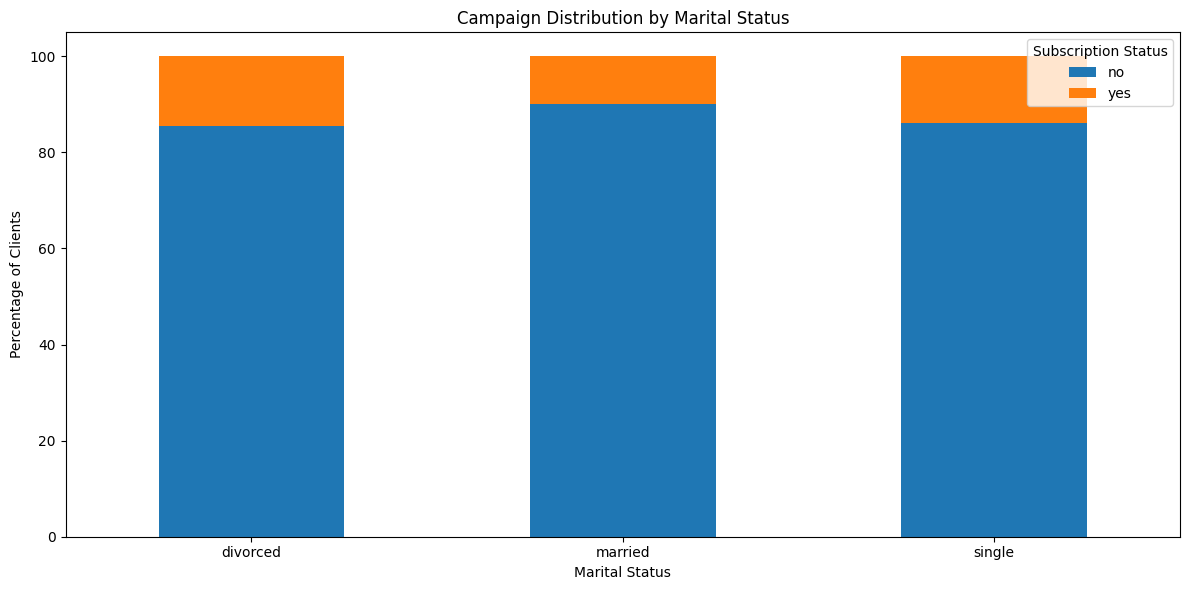

In [ ]:
marital_distribution = df.groupby('marital')['y'].value_counts(normalize=True).unstack() * 100

print(marital_distribution)

marital_distribution.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Campaign Distribution by Marital Status')
plt.ylabel('Percentage of Clients')
plt.xlabel('Marital Status')
plt.xticks(rotation=0, ha='center')
plt.legend(title='Subscription Status')
plt.tight_layout()
plt.show()

- Married people are less likely to subscribe

y                 no        yes
education                      
primary    90.560472   9.439528
secondary  89.375542  10.624458
tertiary   85.703704  14.296296
unknown    89.839572  10.160428


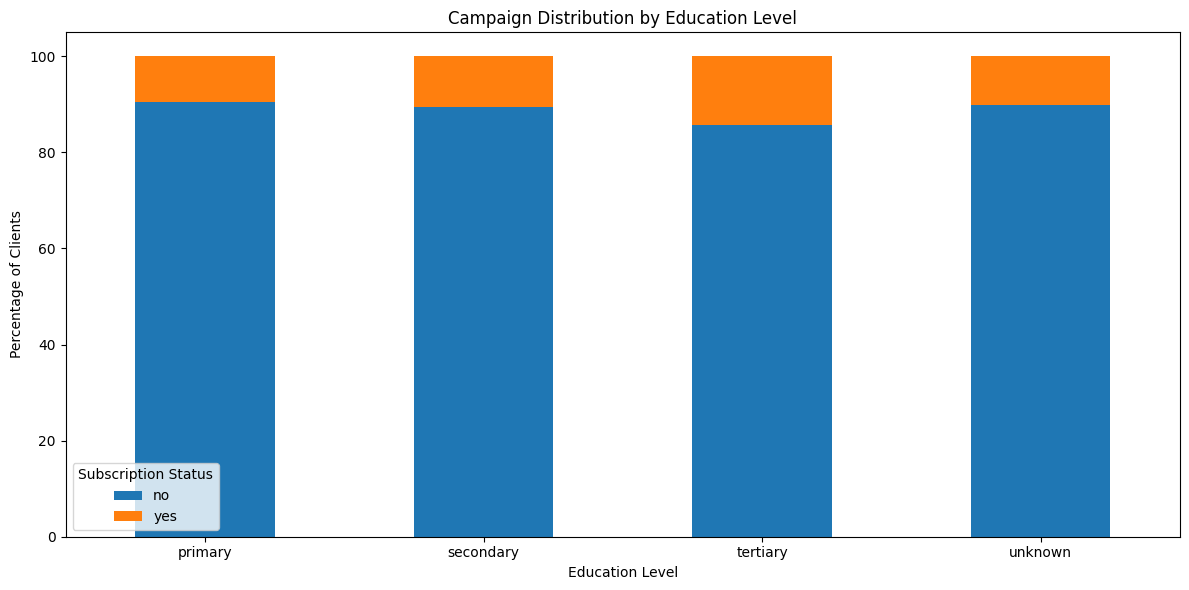

In [ ]:
education_distribution = df.groupby('education')['y'].value_counts(normalize=True).unstack() * 100

print(education_distribution)

education_distribution.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Campaign Distribution by Education Level')
plt.ylabel('Percentage of Clients')
plt.xlabel('Education Level')
plt.xticks(rotation=0, ha='center')
plt.legend(title='Subscription Status')
plt.tight_layout()
plt.show()

- Seems like the trend is that the more education you've received the more likely you are to subscribe

y               no        yes
housing                      
no       84.658512  15.341488
yes      91.402892   8.597108


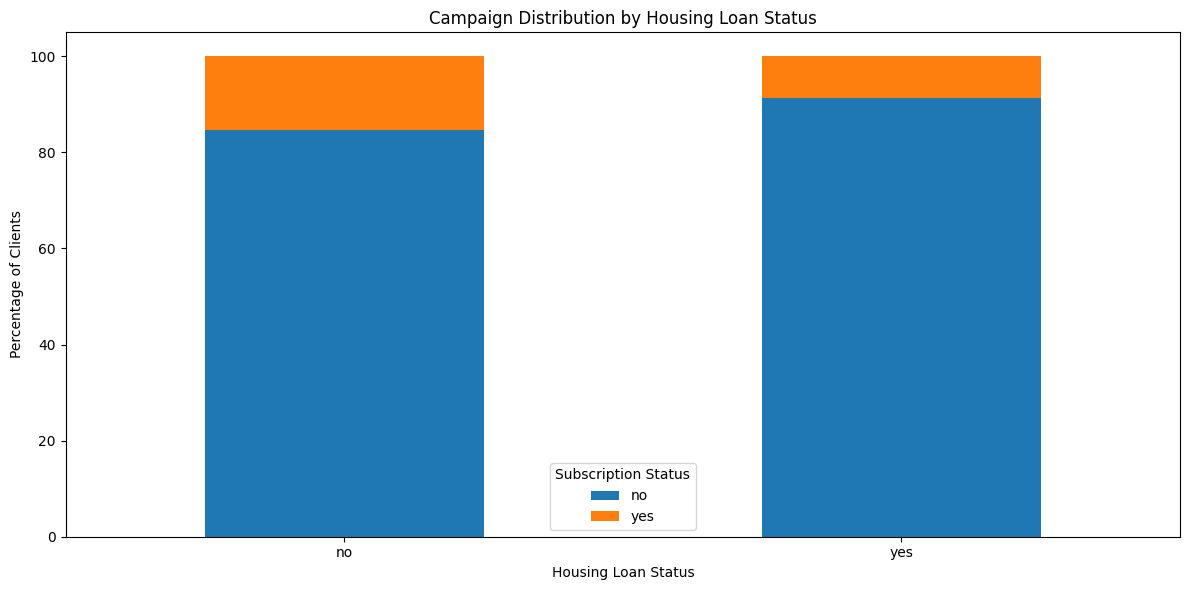

In [ ]:
housing_distribution = df.groupby('housing')['y'].value_counts(normalize=True).unstack() * 100

print(housing_distribution)

housing_distribution.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Campaign Distribution by Housing Loan Status')
plt.ylabel('Percentage of Clients')
plt.xlabel('Housing Loan Status')
plt.xticks(rotation=0, ha='center')
plt.legend(title='Subscription Status')
plt.tight_layout()
plt.show()

- As expected, No housing loan is more likely to subscribe

y            no        yes
loan                      
no    87.519582  12.480418
yes   93.777135   6.222865


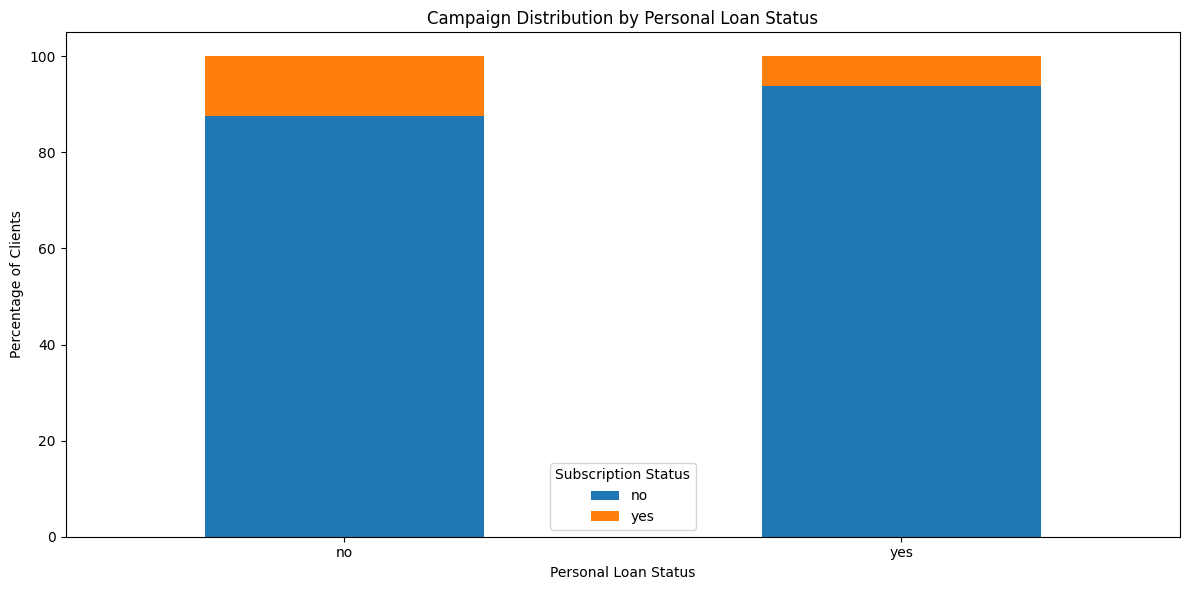

In [ ]:


loan_distribution = df.groupby('loan')['y'].value_counts(normalize=True).unstack() * 100

print(loan_distribution)

loan_distribution.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Campaign Distribution by Personal Loan Status')
plt.ylabel('Percentage of Clients')
plt.xlabel('Personal Loan Status')
plt.xticks(rotation=0, ha='center')
plt.legend(title='Subscription Status')
plt.tight_layout()
plt.show()

- Same as with the housing loan, no Personal loan is more likely to subscribe

y                 no        yes
contact                        
cellular   85.635359  14.364641
telephone  85.382060  14.617940
unknown    95.392749   4.607251


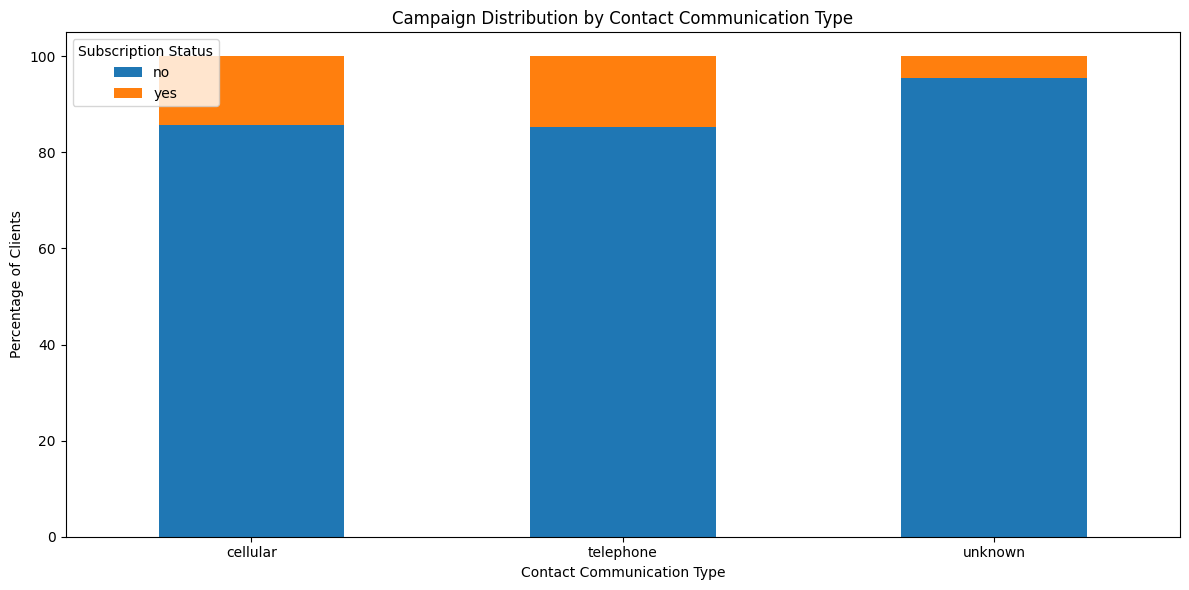

In [ ]:
contact_distribution = df.groupby('contact')['y'].value_counts(normalize=True).unstack() * 100

print(contact_distribution)

contact_distribution.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Campaign Distribution by Contact Communication Type')
plt.ylabel('Percentage of Clients')
plt.xlabel('Contact Communication Type')
plt.xticks(rotation=0, ha='center')
plt.legend(title='Subscription Status')
plt.tight_layout()
plt.show()

- Interestingly contacting by cellular and telephone had about the same success rate.

y             no        yes
month                      
apr    80.887372  19.112628
aug    87.519747  12.480253
dec    55.000000  45.000000
feb    82.882883  17.117117
jan    89.189189  10.810811
jul    91.359773   8.640227
jun    89.642185  10.357815
mar    57.142857  42.857143
may    93.347639   6.652361
nov    89.974293  10.025707
oct    53.750000  46.250000
sep    67.307692  32.692308


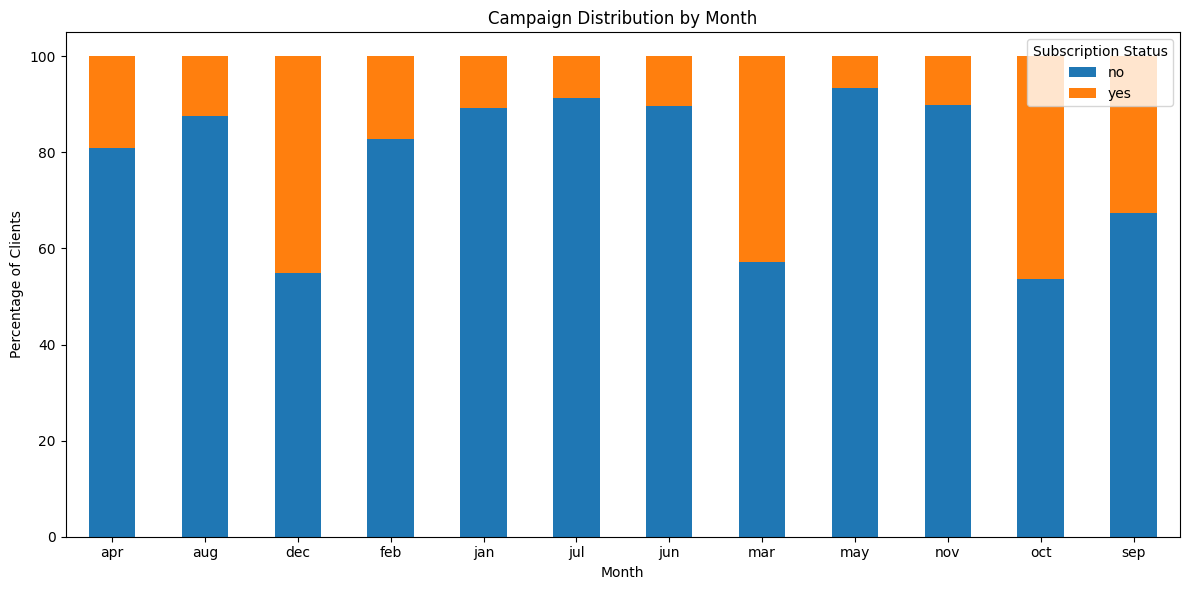

In [ ]:
month_distribution = df.groupby('month')['y'].value_counts(normalize=True).unstack() * 100

print(month_distribution)

month_distribution.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Campaign Distribution by Month')
plt.ylabel('Percentage of Clients')
plt.xlabel('Month')
plt.xticks(rotation=0, ha='center')
plt.legend(title='Subscription Status')
plt.tight_layout()
plt.show()


- Now this is very interesting, you can see that people are much more likely to say yes when contacted in December, March, October, and September.

They are also unlikely to say yes when contacted in May, January, Jun, or July

y                no        yes
poutcome                      
failure   87.142857  12.857143
other     80.710660  19.289340
success   35.658915  64.341085
unknown   90.904184   9.095816


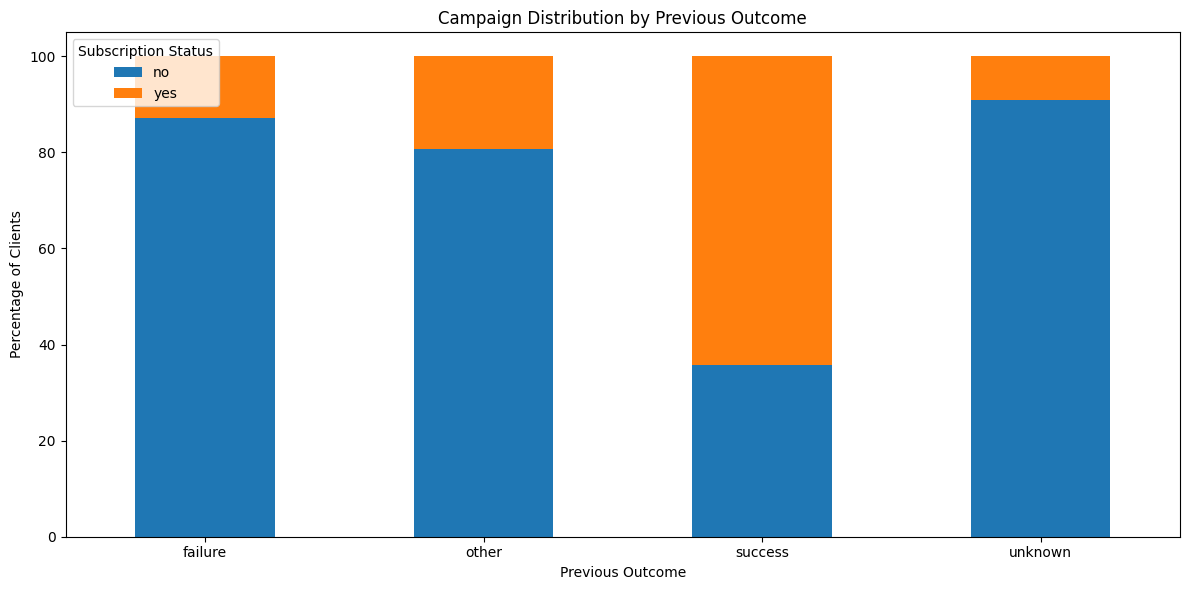

In [ ]:


poutcome_distribution = df.groupby('poutcome')['y'].value_counts(normalize=True).unstack() * 100

print(poutcome_distribution)

poutcome_distribution.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Campaign Distribution by Previous Outcome')
plt.ylabel('Percentage of Clients')
plt.xlabel('Previous Outcome')
plt.xticks(rotation=0, ha='center')
plt.legend(title='Subscription Status')
plt.tight_layout()
plt.show()

- As expected, Previous campaign success correlates quite highly with saying yes.

y               no        yes
default                      
no       88.481440  11.518560
yes      88.157895  11.842105


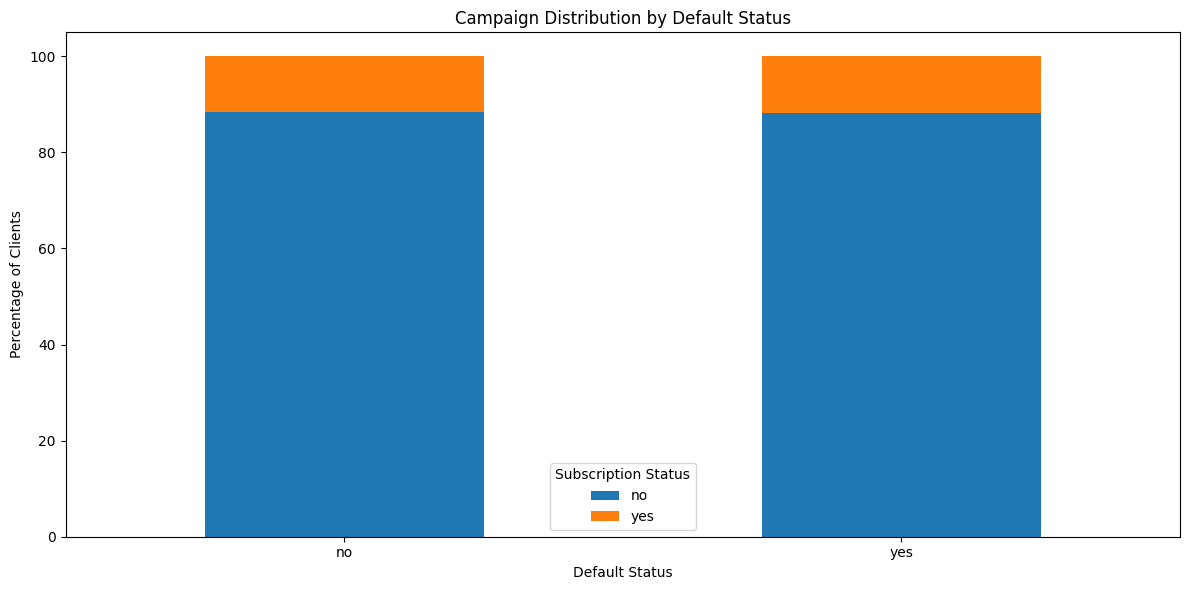

In [ ]:

default_distribution = df.groupby('default')['y'].value_counts(normalize=True).unstack() * 100

print(default_distribution)

default_distribution.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Campaign Distribution by Default Status')
plt.ylabel('Percentage of Clients')
plt.xlabel('Default Status')
plt.xticks(rotation=0, ha='center')
plt.legend(title='Subscription Status')
plt.tight_layout()
plt.show()

- Default status seems to have no impact on the subscription.

y           no        yes
day                      
1    62.962963  37.037037
2    87.719298  12.280702
3    88.571429  11.428571
4    89.928058  10.071942
5    84.530387  15.469613
6    92.513369   7.486631
7    93.157895   6.842105
8    92.222222   7.777778
9    90.184049   9.815951
10   72.000000  28.000000
11   86.842105  13.157895
12   81.456954  18.543046
13   86.746988  13.253012
14   90.256410   9.743590
15   86.781609  13.218391
16   85.365854  14.634146
17   91.623037   8.376963
18   84.513274  15.486726
19   92.039801   7.960199
20   94.163424   5.836576
21   88.383838  11.616162
22   81.395349  18.604651
23   89.215686  10.784314
24   77.777778  22.222222
25   87.500000  12.500000
26   89.090909  10.909091
27   85.840708  14.159292
28   90.607735   9.392265
29   94.285714   5.714286
30   83.928571  16.071429
31   93.220339   6.779661


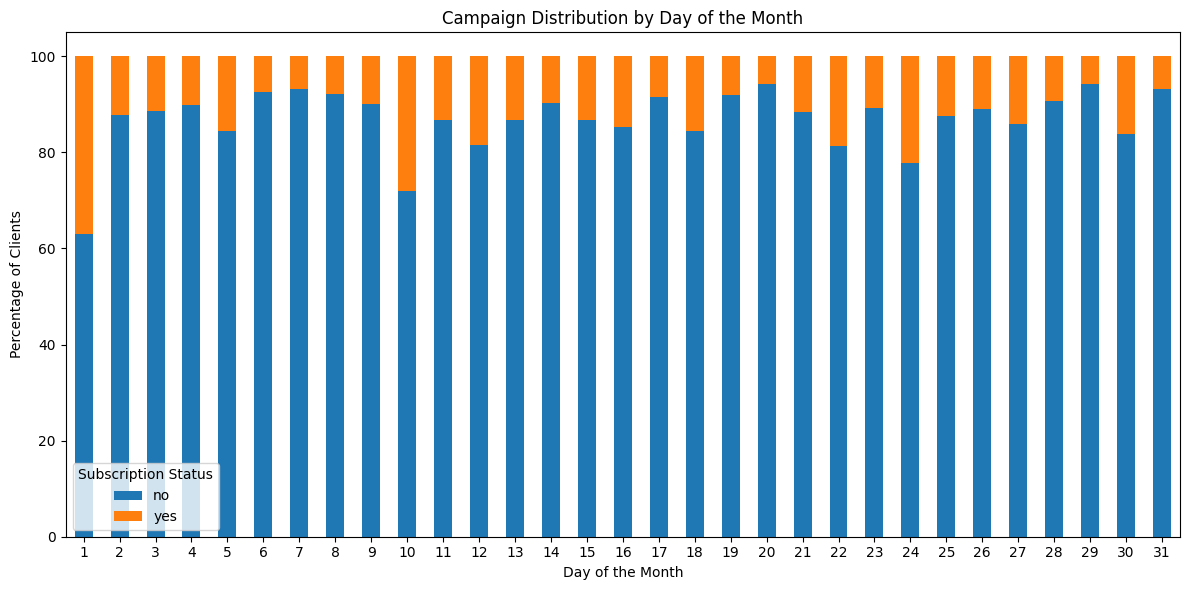

In [ ]:

day_distribution = df.groupby('day')['y'].value_counts(normalize=True).unstack() * 100

print(day_distribution)

day_distribution.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Campaign Distribution by Day of the Month')
plt.ylabel('Percentage of Clients')
plt.xlabel('Day of the Month')
plt.xticks(rotation=0, ha='center')
plt.legend(title='Subscription Status')
plt.tight_layout()
plt.show()

- people are much more likely to say yes when contacted on the first of the Month

## Step 2: Handle Missing Values


In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


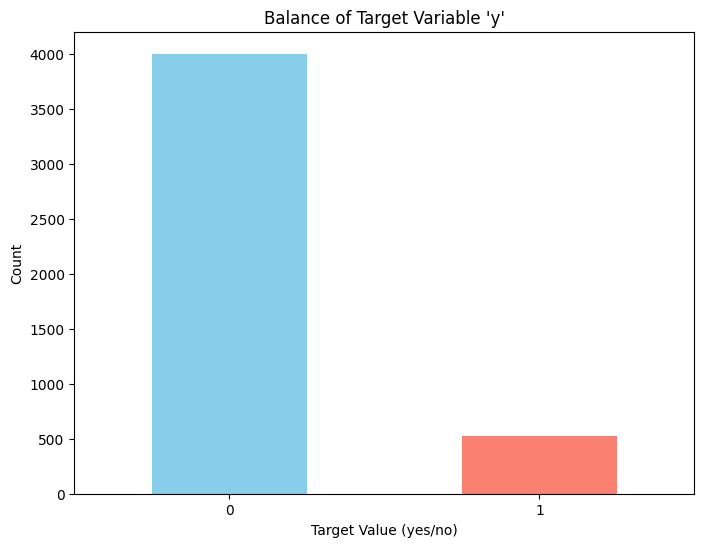

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
df['y'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Balance of Target Variable 'y'")
plt.xlabel("Target Value (yes/no)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

- This right here shows that there is a clear imbalance in the data target variable 'y'.
- This occurs because people are generally more likely to say no to such an offer.
- To solve this issue of imbalance which might hurt the model, an oversampling of the minority class will be attempted.
  - SMOTE (Synthetic Minority Oversampling technique) will be used
  - It will be implemented in the Model notebook

In [ ]:
df['default'] = df['default'].map({'yes': 1, 'no': 0})
df['housing'] = df['housing'].map({'yes': 1, 'no': 0})
df['loan'] = df['loan'].map({'yes': 1, 'no': 0})
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [ ]:
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'], drop_first=True)


##Step 5: Scale Numerical Features


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']] = scaler.fit_transform(df[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']])


##Step 6: Save the Cleaned Data

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

In [ ]:
from zipfile import ZipFile


with ZipFile('./processed_data.zip', 'w') as zipf:
    zipf.write('./X_train.csv', 'X_train.csv')
    zipf.write('./X_test.csv', 'X_test.csv')
    zipf.write('./y_train.csv', 'y_train.csv')
    zipf.write('./y_test.csv', 'y_test.csv')

In [ ]:
X_train = pd.read_csv('./X_train.csv')
X_test = pd.read_csv('./X_test.csv')
y_train = pd.read_csv('./y_train.csv')
y_test = pd.read_csv('./y_test.csv')

# Convert DataFrames to numpy arrays and save them as .npy files
np.save('./X_train.npy', X_train.values)
np.save('./X_test.npy', X_test.values)
np.save('./y_train.npy', y_train.values)
np.save('./y_test.npy', y_test.values)

In [ ]:
with ZipFile('./processed_data_npy.zip', 'w') as zipf:
    zipf.write('./X_train.npy', 'X_train.npy')
    zipf.write('./X_test.npy', 'X_test.npy')
    zipf.write('./y_train.npy', 'y_train.npy')
    zipf.write('./y_test.npy', 'y_test.npy')
